In [1]:
import sys
sys.path.append("../MILESTONE1")
from file import df_suffle

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [39]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model


In [40]:
train_df, val_df = train_test_split(
    df_suffle,
    test_size=0.2,
    random_state=42,
    stratify=df_suffle['Brand']
)


In [43]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=2,
    brightness_range=[0.9, 1.1]
)

val_data = ImageDataGenerator(
    rescale=1./255
)


In [44]:
train_generator = train_data.flow_from_dataframe(
    train_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_data.flow_from_dataframe(
    val_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 400 validated image filenames belonging to 3 classes.
Found 100 validated image filenames belonging to 3 classes.


In [45]:
base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

base_model.trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(3,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [47]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3540 - loss: 1.3294 - val_accuracy: 0.4000 - val_loss: 0.9948
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 907ms/step - accuracy: 0.4705 - loss: 1.0269 - val_accuracy: 0.5300 - val_loss: 0.8499
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 894ms/step - accuracy: 0.5401 - loss: 0.8602 - val_accuracy: 0.5700 - val_loss: 0.7736
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 909ms/step - accuracy: 0.6430 - loss: 0.7526 - val_accuracy: 0.6600 - val_loss: 0.7219
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 894ms/step - accuracy: 0.6010 - loss: 0.8043 - val_accuracy: 0.6600 - val_loss: 0.6865
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 897ms/step - accuracy: 0.6521 - loss: 0.7181 - val_accuracy: 0.7200 - val_loss: 0.6302
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 896ms/step - accuracy: 0.6658 - loss: 0.7005 - val_accuracy: 0.7400 - val_loss: 0.6194
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 883ms/step - accuracy: 0.6683 - loss: 0.7078 - val_accuracy: 0.7800 -

In [48]:
train_df,temp_df=train_test_split(
    df_suffle,
    test_size=0.4,         
    stratify=df_suffle['Brand'],
    random_state=42
)

val_df,test_df= train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['Brand'],
    random_state=42
)

In [49]:
test_generator=val_data.flow_from_dataframe(
    test_df,
    x_col="Image",
    y_col="Brand",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=16,
    shuffle=False
)


Found 100 validated image filenames belonging to 3 classes.


In [50]:
test_loss,test_accuracy=model.evaluate(test_generator)
print("test_accuracy",test_accuracy)

c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 0.8256 - loss: 0.4429
test_accuracy 0.8299999833106995


In [51]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_true=val_generator.classes
y_pred=np.argmax(model.predict(val_generator),axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=val_generator.class_indices.keys()
))

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 776ms/step
              precision    recall  f1-score   support

       canon       0.80      0.82      0.81        40
       epson       0.81      0.72      0.76        40
          hp       0.87      1.00      0.93        20

    accuracy                           0.82       100
   macro avg       0.83      0.85      0.84       100
weighted avg       0.82      0.82      0.82       100



<Axes: >

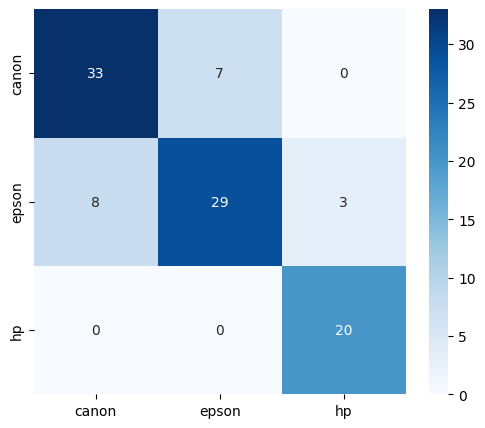

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys()
)
